# Predict rents for Cologne

In [ ]:
# Predict rents for Cologne
Dataset: https://www.kaggle.com/corrieaar/apartment-rental-offers-in-germany

The dataset contains a collection of immoscout24 data for rents in Germany.

Task:

First, reduce the data to the urban area of Cologne. Perform the usual steps in a machine learning project. Create a predictive model that predicts the rent as well as possible for the given data.

Also, create visualizations of interesting relationships.

Compare different methods for incorporating non-metric features and different algorithms. Investigate which features have a measurable impact on rent.

# Import all necessary packages 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from scipy.stats import norm
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from collections import Counter
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_auc_score, confusion_matrix

In [44]:
Deutschland_rents_Predict = pd.read_csv("immo_data.csv")

In [45]:
Deutschland_rents_Predict

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,...,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,NaN,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.00,gas_heating,NaN,NaN,False,True,12,6.49,NaN,...,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",NaN,NaN,2015.0,NaN,NaN,May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,...,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...,"Böden: Wohn-/Schlafbereich = Laminat, Küche + ...",NaN,NaN,2019.0,NaN,NaN,Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,NaN,True,True,16,4.39,NaN,...,Köln,Dellbrück,"Neubau Erstbezug, gehobener Standard, alle Ein...","Wände:\nMaler­vlies, weiß gestrichen alter­nat...",40.00,NO_INFORMATION,2019.0,NaN,NaN,May19


In our dataset, we have overall 268850 rows and 49 columns 


# Checking the number of rows and columns

In [46]:
#The shape is used to indicate the number of rows and columns in the dataset.
print(Deutschland_rents_Predict.shape)

(268850, 49)


In [62]:
# These 3 columns represent the TotalRent, BaseRent and HeatingCosts
Deutschland_rents_Predict_miete = Deutschland_rents_Predict.loc[:, ["baseRent", "totalRent","heatingCosts"]]
Deutschland_rents_Predict_miete.info()

# Normally we should use the TotalRent column as Price column but,
# because we have a lot of missing values in the HeatingCosts column it is impossible to determine the TotalRent
# without loosing the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   baseRent      268850 non-null  float64
 1   totalRent     228333 non-null  float64
 2   heatingCosts  85518 non-null   float64
dtypes: float64(3)
memory usage: 6.2 MB


In [63]:
# Let's see what we have there
Deutschland_rents_Predict.totalRent.describe()

count    2.283330e+05
mean     9.013315e+02
std      3.323833e+04
min      0.000000e+00
25%      4.698000e+02
50%      6.500000e+02
75%      9.850000e+02
max      1.575154e+07
Name: totalRent, dtype: float64

In [64]:
# Let's see what we have there
Deutschland_rents_Predict.baseRent.describe()

count    2.688500e+05
mean     6.941294e+02
std      1.953602e+04
min      0.000000e+00
25%      3.380000e+02
50%      4.900000e+02
75%      7.990000e+02
max      9.999999e+06
Name: baseRent, dtype: float64

In [65]:
# Let's see what we have there
Deutschland_rents_Predict.heatingCosts.describe()

count    85518.000000
mean        76.990866
std        147.716278
min          0.000000
25%         54.000000
50%         70.000000
75%         90.000000
max      12613.000000
Name: heatingCosts, dtype: float64

In [50]:
print(Deutschland_rents_Predict.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [51]:
#Check if there are any duplicate rows
Deutschland_rents_Predict.duplicated(keep=False).sum()

0

In [52]:
Deutschland_rents_Predict.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,...,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,...,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,...,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [53]:
Deutschland_rents_Predict.isnull().sum().max()

223830

In [54]:
Deutschland_rents_Predict['regio2']

0                        Dortmund
1               Rhein_Pfalz_Kreis
2                         Dresden
3             Mittelsachsen_Kreis
4                          Bremen
                   ...           
268845    Weilheim_Schongau_Kreis
268846           Bergstraße_Kreis
268847     Limburg_Weilburg_Kreis
268848                       Köln
268849          Frankfurt_am_Main
Name: regio2, Length: 268850, dtype: object

In [55]:
Deutschland_rents_Predict['regio2'].isna().sum()

0

# Our main goal is to Predict rents for Cologne. So need to focus on it. However, we can select the regio2 to select the city cologne 

In [57]:
# Selecting NRW
Cologne_rents_Predict = Cologne_rents_Predict[Cologne_rents_Predict["regio2"] == 'Köln']

In [58]:
Cologne_rents_Predict

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
253,Nordrhein_Westfalen,NaN,NaN,ONE_YEAR_FREE,NaN,False,False,10,4.91,40.0,...,Köln,Altstadt_&_Neustadt_Nord,gepflegtes Mehrfamilienhaus,"zeitlose Möblierung, Laminatboden, separate Ei...",NaN,NaN,NaN,NaN,NaN,Feb20
336,Nordrhein_Westfalen,200.0,floor_heating,NaN,NaN,True,True,11,4.42,NaN,...,Köln,Dellbrück,Zum 01.11.2019 können Sie diese Maisonette-Woh...,"Bodentiefe Fenster, Fussbodenheizung, Fensterb...",NaN,NaN,NaN,NaN,NaN,Oct19
352,Nordrhein_Westfalen,110.0,central_heating,ONE_YEAR_FREE,NaN,False,False,4,4.55,10.0,...,Köln,Sülz,Herzlich Willkommen in Ihrem neuen Zuhause.\n\...,NaN,NaN,NaN,NaN,NaN,NaN,Oct19
524,Nordrhein_Westfalen,274.8,central_heating,ONE_YEAR_FREE,10.0,False,True,16,5.08,10.0,...,Köln,Altstadt_&_Neustadt_Nord,Diese schöne Wohnung befindet sich in bester I...,Die Wohnung ist modern ausgestattet. \n\nDas W...,NaN,NaN,NaN,90.76,0.1985,Sep18
590,Nordrhein_Westfalen,135.0,central_heating,NONE,NaN,False,True,10,4.37,2.4,...,Köln,Lövenich,ANMELDUNG FÜR BESICHTIGUNGSTERMIN\nMit dem unt...,NaN,85.0,NaN,NaN,NaN,NaN,Oct19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268381,Nordrhein_Westfalen,151.0,NaN,ONE_YEAR_FREE,NaN,False,False,8,5.08,40.0,...,Köln,Altstadt_&_Neustadt_Süd,Dieses schicke Ein-Zimmer-Apartment liegt sehr...,Bezug: 01. Mai 2019\nObjektart: 1-Zimmer-Apart...,NaN,NaN,NaN,NaN,NaN,May19
268523,Nordrhein_Westfalen,160.0,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,5,6.42,40.0,...,Köln,Gremberghoven,+ Barrierearm Wohlfühlen - mit einem modernen ...,Rollläden; Warmwasser zentral (über Heizanlage...,NaN,NaN,NaN,NaN,NaN,May19
268637,Nordrhein_Westfalen,130.0,central_heating,ONE_YEAR_FREE,NaN,False,False,10,4.55,40.0,...,Köln,Sülz,Die hier angebotene Wohnung befindet sich im 1...,Das neu hergestellte Duschbad wurde mit großfo...,NaN,NaN,2019.0,NaN,NaN,Oct19
268772,Nordrhein_Westfalen,230.0,floor_heating,ONE_YEAR_FREE,NaN,False,True,8,4.23,40.0,...,Köln,Junkersdorf,Diese freundliche Wohnung im zweiten Stock kan...,NaN,NaN,NaN,NaN,NaN,NaN,Feb20


# checking the first 5 records

In [59]:
Cologne_rents_Predict.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
253,Nordrhein_Westfalen,NaN,NaN,ONE_YEAR_FREE,NaN,False,False,10,4.91,40.0,...,Köln,Altstadt_&_Neustadt_Nord,gepflegtes Mehrfamilienhaus,"zeitlose Möblierung, Laminatboden, separate Ei...",NaN,NaN,NaN,NaN,NaN,Feb20
336,Nordrhein_Westfalen,200.0,floor_heating,NaN,NaN,True,True,11,4.42,NaN,...,Köln,Dellbrück,Zum 01.11.2019 können Sie diese Maisonette-Woh...,"Bodentiefe Fenster, Fussbodenheizung, Fensterb...",NaN,NaN,NaN,NaN,NaN,Oct19
352,Nordrhein_Westfalen,110.0,central_heating,ONE_YEAR_FREE,NaN,False,False,4,4.55,10.0,...,Köln,Sülz,Herzlich Willkommen in Ihrem neuen Zuhause.\n\...,NaN,NaN,NaN,NaN,NaN,NaN,Oct19
524,Nordrhein_Westfalen,274.8,central_heating,ONE_YEAR_FREE,10.0,False,True,16,5.08,10.0,...,Köln,Altstadt_&_Neustadt_Nord,Diese schöne Wohnung befindet sich in bester I...,Die Wohnung ist modern ausgestattet. \n\nDas W...,NaN,NaN,NaN,90.76,0.1985,Sep18
590,Nordrhein_Westfalen,135.0,central_heating,NONE,NaN,False,True,10,4.37,2.4,...,Köln,Lövenich,ANMELDUNG FÜR BESICHTIGUNGSTERMIN\nMit dem unt...,NaN,85.0,NaN,NaN,NaN,NaN,Oct19


# checking the last 5 records

In [232]:
Cologne_rents_Predict.tail()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
268381,Nordrhein_Westfalen,151.0,NaN,ONE_YEAR_FREE,NaN,False,False,8,5.08,40.0,...,Köln,Altstadt_&_Neustadt_Süd,Dieses schicke Ein-Zimmer-Apartment liegt sehr...,Bezug: 01. Mai 2019\nObjektart: 1-Zimmer-Apart...,NaN,NaN,NaN,NaN,NaN,May19
268523,Nordrhein_Westfalen,160.0,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,5,6.42,40.0,...,Köln,Gremberghoven,+ Barrierearm Wohlfühlen - mit einem modernen ...,Rollläden; Warmwasser zentral (über Heizanlage...,NaN,NaN,NaN,NaN,NaN,May19
268637,Nordrhein_Westfalen,130.0,central_heating,ONE_YEAR_FREE,NaN,False,False,10,4.55,40.0,...,Köln,Sülz,Die hier angebotene Wohnung befindet sich im 1...,Das neu hergestellte Duschbad wurde mit großfo...,NaN,NaN,2019.0,NaN,NaN,Oct19
268772,Nordrhein_Westfalen,230.0,floor_heating,ONE_YEAR_FREE,NaN,False,True,8,4.23,40.0,...,Köln,Junkersdorf,Diese freundliche Wohnung im zweiten Stock kan...,NaN,NaN,NaN,NaN,NaN,NaN,Feb20
268848,Nordrhein_Westfalen,175.0,heat_pump,NaN,NaN,True,True,16,4.39,NaN,...,Köln,Dellbrück,"Neubau Erstbezug, gehobener Standard, alle Ein...","Wände:\nMaler­vlies, weiß gestrichen alter­nat...",40.0,NO_INFORMATION,2019.0,NaN,NaN,May19


In [60]:
Cologne_rents_Predict.shape

(2709, 49)

In [61]:
Deutschland_rents_Predict.shape

(268850, 49)

# Feature  / Column type Information 

In [181]:
print(Cologne_rents_Predict.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2709 entries, 253 to 268848
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   regio1                    2709 non-null   object 
 1   serviceCharge             2579 non-null   float64
 2   heatingType               2314 non-null   object 
 3   telekomTvOffer            2241 non-null   object 
 4   telekomHybridUploadSpeed  429 non-null    float64
 5   newlyConst                2709 non-null   bool   
 6   balcony                   2709 non-null   bool   
 7   picturecount              2709 non-null   int64  
 8   pricetrend                2698 non-null   float64
 9   telekomUploadSpeed        2241 non-null   float64
 10  totalRent                 2277 non-null   float64
 11  yearConstructed           1972 non-null   float64
 12  scoutId                   2709 non-null   int64  
 13  noParkSpaces              935 non-null    float64
 14  firi

We got 4 types of value they are  objects, Float, bool, and int. Here is the number of type value 

1. 19 columns are Object type 
2. 18 columns are float 64 type 
3. 6 columns are bool type
4. 6 columns are int 64 type

 In our dataset we have 3 columns which are most important columns we need to know more deatils about 3  columns 
The 3 columns are 
1.Baserent
2.TotalRent 
3.Heatingcosts-Heizkosten

# Checking Categorical Data

In [246]:
# Checking Categorical Data
Cologne_rents_Predict.select_dtypes(include=['object']).columns

Index(['regio1', 'heatingType', 'telekomTvOffer', 'firingTypes', 'geo_bln',
       'houseNumber', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'typeOfFlat', 'regio2', 'regio3',
       'description', 'facilities', 'energyEfficiencyClass', 'date'],
      dtype='object')

# Checking Numerical Data

In [247]:
# Checking Numerical Data
Cologne_rents_Predict.select_dtypes(include=['int64','float64']).columns

Index(['serviceCharge', 'telekomHybridUploadSpeed', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'yearConstructedRange', 'baseRent',
       'livingSpace', 'baseRentRange', 'geo_plz', 'noRooms', 'thermalChar',
       'floor', 'numberOfFloors', 'noRoomsRange', 'livingSpaceRange',
       'heatingCosts', 'lastRefurbish', 'electricityBasePrice',
       'electricityKwhPrice'],
      dtype='object')

In [248]:
# Checking bool Data
Cologne_rents_Predict.select_dtypes(include=['bool']).columns

Index(['newlyConst', 'balcony', 'hasKitchen', 'cellar', 'lift', 'garden'], dtype='object')

# TotalRent, BaseRent and HeatingCosts type

In [182]:
# These 3 columns represent the TotalRent, BaseRent and HeatingCosts
Cologne_rents_Predict_miete = Cologne_rents_Predict.loc[:, ["baseRent", "totalRent","heatingCosts"]]
Cologne_rents_Predict_miete.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2709 entries, 253 to 268848
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   baseRent      2709 non-null   float64
 1   totalRent     2277 non-null   float64
 2   heatingCosts  503 non-null    float64
dtypes: float64(3)
memory usage: 164.7 KB


1. BaseRent,Total Rent and HeatingCosts are float64 type value 

In [233]:
Cologne_rents_Predict.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,2579.000000,429.0,2709.000000,2698.000000,2241.000000,2277.000000,1972.000000,2.709000e+03,935.000000,1972.000000,...,2709.000000,1343.000000,2292.000000,2086.000000,2709.000000,2709.000000,503.000000,999.000000,4.730000e+02,473.000000
mean,188.083432,10.0,10.855666,4.698773,29.174565,1188.505459,1978.103955,1.069762e+08,1.082353,4.305274,...,2.397010,128.862748,2.302356,4.147172,2.362495,3.104836,75.762366,2015.649650,9.076000e+01,0.198485
std,109.372797,0.0,6.742537,0.560427,15.878959,625.642984,33.389889,1.302226e+07,0.830791,2.819644,...,1.028807,151.212070,2.336347,3.539962,1.015033,1.617645,57.160363,5.037274,5.690360e-14,0.000322
min,0.000000,10.0,0.000000,2.270000,2.400000,280.000000,1700.000000,3.224097e+07,0.000000,1.000000,...,1.000000,7.000000,-1.000000,0.000000,1.000000,1.000000,0.000000,1978.000000,9.076000e+01,0.191500
25%,115.000000,10.0,6.000000,4.360000,10.000000,780.730000,1961.000000,1.070247e+08,1.000000,2.000000,...,2.000000,74.950000,1.000000,3.000000,2.000000,2.000000,50.000000,2014.000000,9.076000e+01,0.198500
50%,160.000000,10.0,10.000000,4.840000,40.000000,1000.000000,1977.000000,1.113122e+08,1.000000,3.000000,...,2.000000,112.600000,2.000000,4.000000,2.000000,3.000000,70.000000,2018.000000,9.076000e+01,0.198500
75%,240.000000,10.0,14.000000,5.080000,40.000000,1440.000000,2008.000000,1.137938e+08,1.000000,7.000000,...,3.000000,152.000000,3.000000,5.000000,3.000000,4.000000,97.500000,2019.000000,9.076000e+01,0.198500
max,1350.000000,10.0,66.000000,6.850000,100.000000,5629.100000,2020.000000,1.157114e+08,20.000000,9.000000,...,6.000000,1717.900000,41.000000,45.000000,5.000000,7.000000,970.000000,2020.000000,9.076000e+01,0.198500


In [184]:
# Let's see what we have there
Cologne_rents_Predict.baseRent.describe()

count    2709.000000
mean      978.991628
std       540.963164
min       220.000000
25%       637.820000
50%       825.000000
75%      1190.000000
max      5000.000000
Name: baseRent, dtype: float64

In [185]:
# Let's see what we have there
Cologne_rents_Predict.totalRent.describe()

count    2277.000000
mean     1188.505459
std       625.642984
min       280.000000
25%       780.730000
50%      1000.000000
75%      1440.000000
max      5629.100000
Name: totalRent, dtype: float64

In [186]:
# Let's see what we have there
Cologne_rents_Predict.heatingCosts.describe()

count    503.000000
mean      75.762366
std       57.160363
min        0.000000
25%       50.000000
50%       70.000000
75%       97.500000
max      970.000000
Name: heatingCosts, dtype: float64

# Heating Type with overall number 

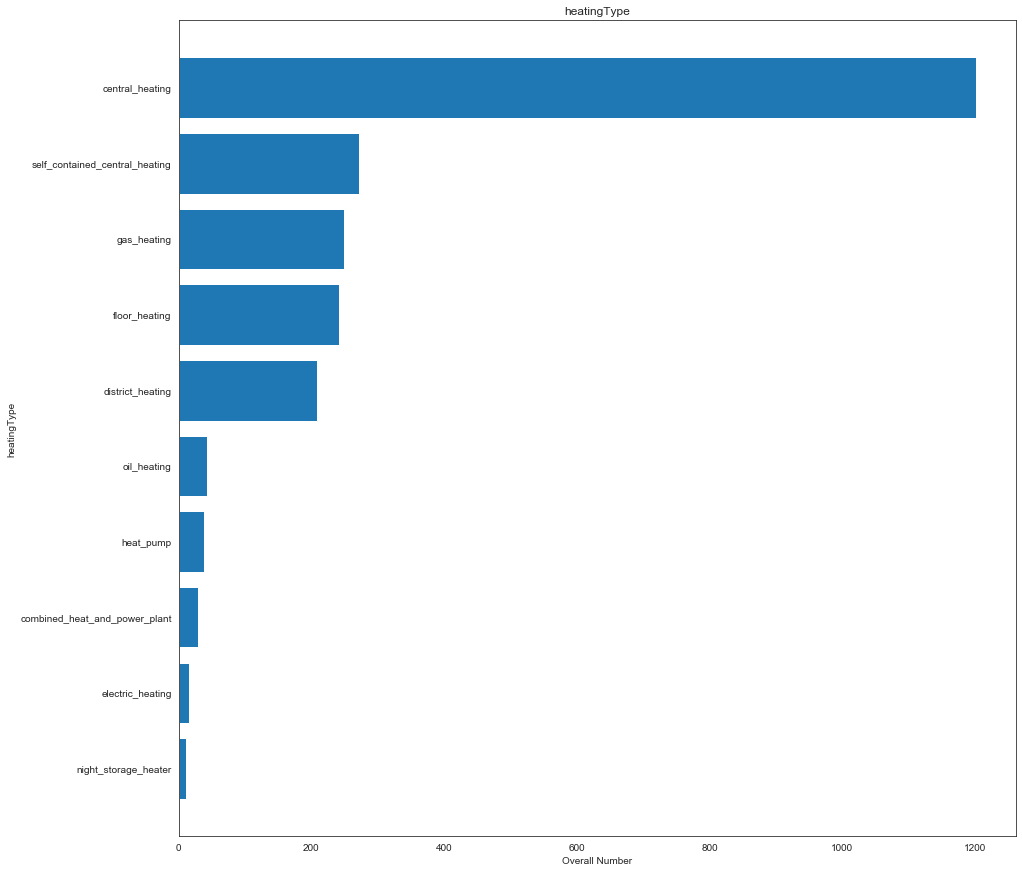

In [191]:
plt.figure(figsize=(15, 15))
our_data = Cologne_rents_Predict.heatingType.value_counts()[:10]
x = list(our_data.index)
y = list(our_data.values)
x.reverse()
y.reverse()

plt.title("heatingType")
plt.ylabel("heatingType")
plt.xlabel("Overall Number")

plt.barh(x, y)
plt.show()

1.Central heating is the essential heating type followed by self-contained central heating and the less important heating types is the night storage heater

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px

# Creating data frame with baseRent per district in Köln

In [199]:
# Creating data frame with baseRent( Kaltemiete) per district in Köln
pie_data_output = Cologne_rents_Predict.regio3.value_counts()
pie_data_output = pd.DataFrame(pie_data_output)
pie_data_output.rename(columns = {"index": "regio3", "regio3": "baseRent"}, inplace = True)
pie_data_output

,baseRent
Altstadt_&_Neustadt_Nord,285
Altstadt_&_Neustadt_Süd,272
Lindenthal,112
Mülheim,99
Junkersdorf,85
...,...
Fühlingen,3
Finkenberg,3
Chorweiler,2
Hahnwald,2


In [200]:
# Graphing percentage of baserent (Kaltemiete) that each Köln district has with pyplot
fig = px.pie(pie_data_output, values = pie_data_output.baseRent, names = pie_data_output.index)
fig.update_traces(textposition = 'inside', textinfo = 'percent+label')
fig.update_layout(template = 'plotly_white')

fig.show()

# Creating data frame with Total Rent per district in Köln

In [206]:
# Creating data frame with Total Rent per district in Köln
pie_data_output = Cologne_rents_Predict.regio3.value_counts()
pie_data_output = pd.DataFrame(pie_data_output)
pie_data_output.rename(columns = {"index": "regio3", "regio3": "totalRent"}, inplace = True)
pie_data_output

,totalRent
Altstadt_&_Neustadt_Nord,285
Altstadt_&_Neustadt_Süd,272
Lindenthal,112
Mülheim,99
Junkersdorf,85
...,...
Fühlingen,3
Finkenberg,3
Chorweiler,2
Hahnwald,2


In [207]:
# Graphing percentage of Total rent( Warme miete) that each Köln district has with pyplot
fig = px.pie(pie_data_output, values = pie_data_output.totalRent, names = pie_data_output.index)
fig.update_traces(textposition = 'inside', textinfo = 'percent+label')
fig.update_layout(template = 'plotly_white')

fig.show()

In [188]:
import time
import datetime
from datetime import date
from plotly.offline import init_notebook_mode, iplot

# Mean price by the district in Köln-Based on Total Rent (Warmemiete)

In [230]:
district_Köln = Cologne_rents_Predict[Cologne_rents_Predict["regio3"].str.contains(r"[Kk]reis") == False]
Cologne_rents_Predict_by_Köln_district = district_Köln.pivot_table(values='totalRent', index='regio3', aggfunc=(np.mean)).reset_index()
Cologne_rents_Predict_by_Köln_district = Cologne_rents_Predict_by_Köln_district.sort_values(by=['totalRent'], ascending=False)
Cologne_rents_Predict_by_Köln_district['totalRent'] = Cologne_rents_Predict_by_Köln_district['totalRent'].astype(int)

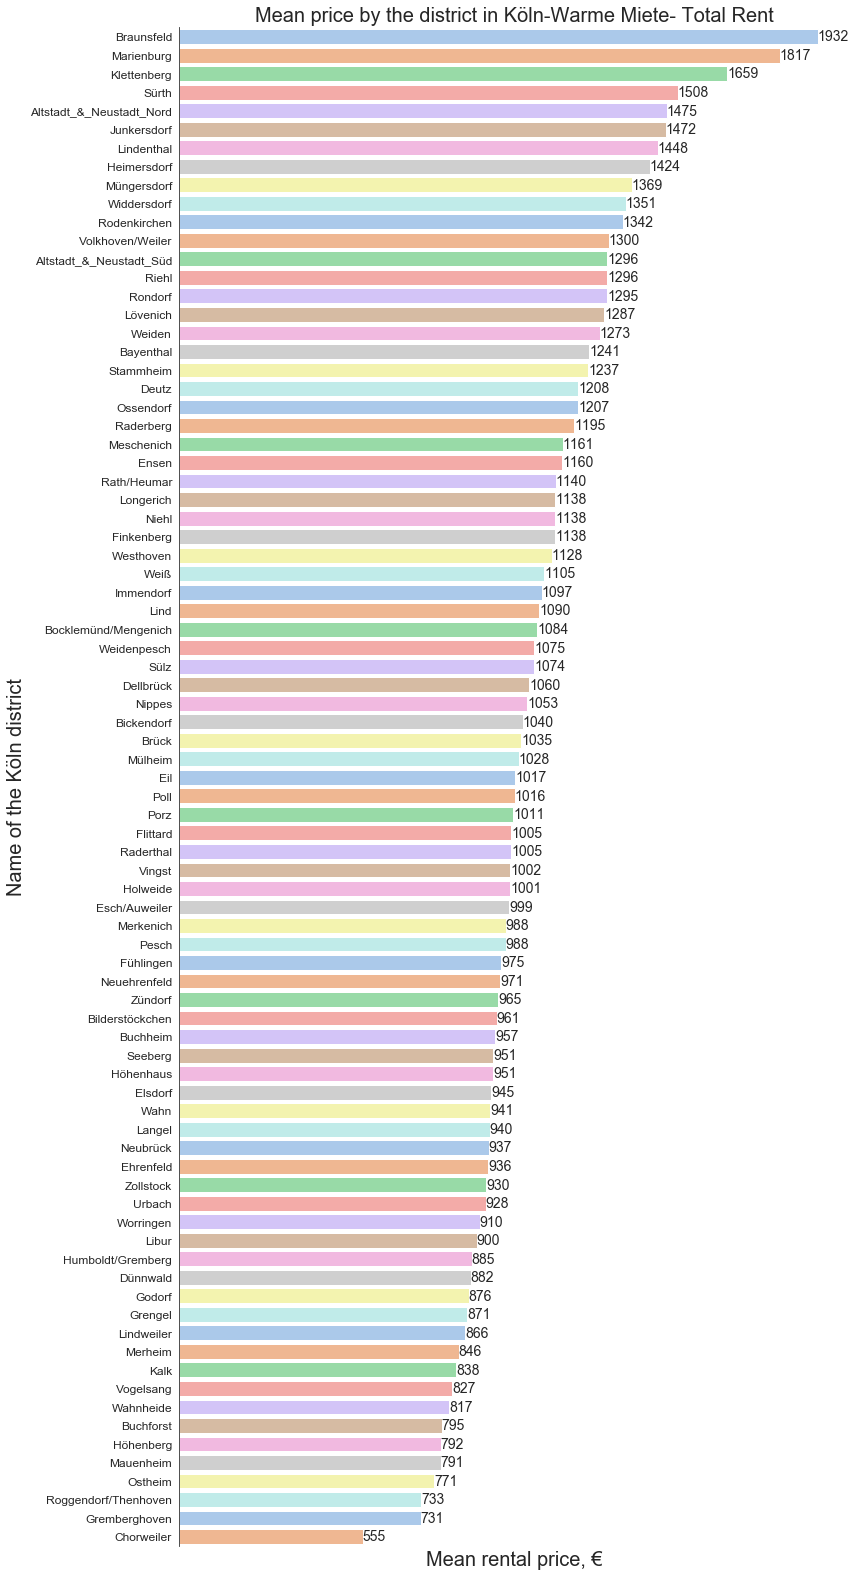

In [255]:
sns.set_style('white')

fig = plt.subplots(figsize=(12, 22))
ax = sns.barplot(x='totalRent',
                 y='regio3',
                 data=Cologne_rents_Predict_by_Köln_district,
                 orient='h',
                 palette='pastel')

# Setting the annotation on the top of the barchart
n = 0
for land, value in Cologne_rents_Predict_by_Köln_district.iterrows():
    ax.text(x=value[1],  # where to put the text on the x coordinates
            y=n,  # where to put the text on the y coordinates
            s=value[1],  # value to text
            fontsize=14,  # fontsize
            horizontalalignment='left',  # center the text to be more pleasant
            verticalalignment='center')
    n += 1

ax.tick_params(axis='x', labelsize=12, labelbottom=False)
ax.tick_params(axis='y', labelsize=12, bottom='off')
ax.set_title('Mean price by the district in Köln-Warme Miete- Total Rent', fontsize=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)


ax.set_ylabel('Name of the Köln district', fontsize=20)
ax.set_xlabel('Mean rental price, €', fontsize=20)
plt.tight_layout()

plt.show()

After examining our average pricing (Total Rent) by district in Köln, it is clear that

1. Braunsfeld, Marienburg, Klettenberg, Sürth, Altstadt_ und Neustadt nord, and so on are the most expensive districts.

2. The less expensive districts are Buchforst, Höhenberg, Mauenheim, Ostheim, Roggendorf/Thenhoven, Gremberghoven, Chorweiler, and so on.

3. X-asis denotes our average rental price, whereas Y-asis denotes the complete Köln district name.

# Mean price by the district in Köln-Based on Base Rent (kalte miete)

In [254]:
district_Köln_base = Cologne_rents_Predict[Cologne_rents_Predict["regio3"].str.contains(r"[Kk]reis") == False]
Cologne_rents_Predict_by_Köln_district_01 = district_Köln_base.pivot_table(values='baseRent', index='regio3', aggfunc=(np.mean)).reset_index()
Cologne_rents_Predict_by_Köln_district_01 = Cologne_rents_Predict_by_Köln_district_01.sort_values(by=['baseRent'], ascending=False)
Cologne_rents_Predict_by_Köln_district_01['baseRent'] = Cologne_rents_Predict_by_Köln_district_01['baseRent'].astype(int)

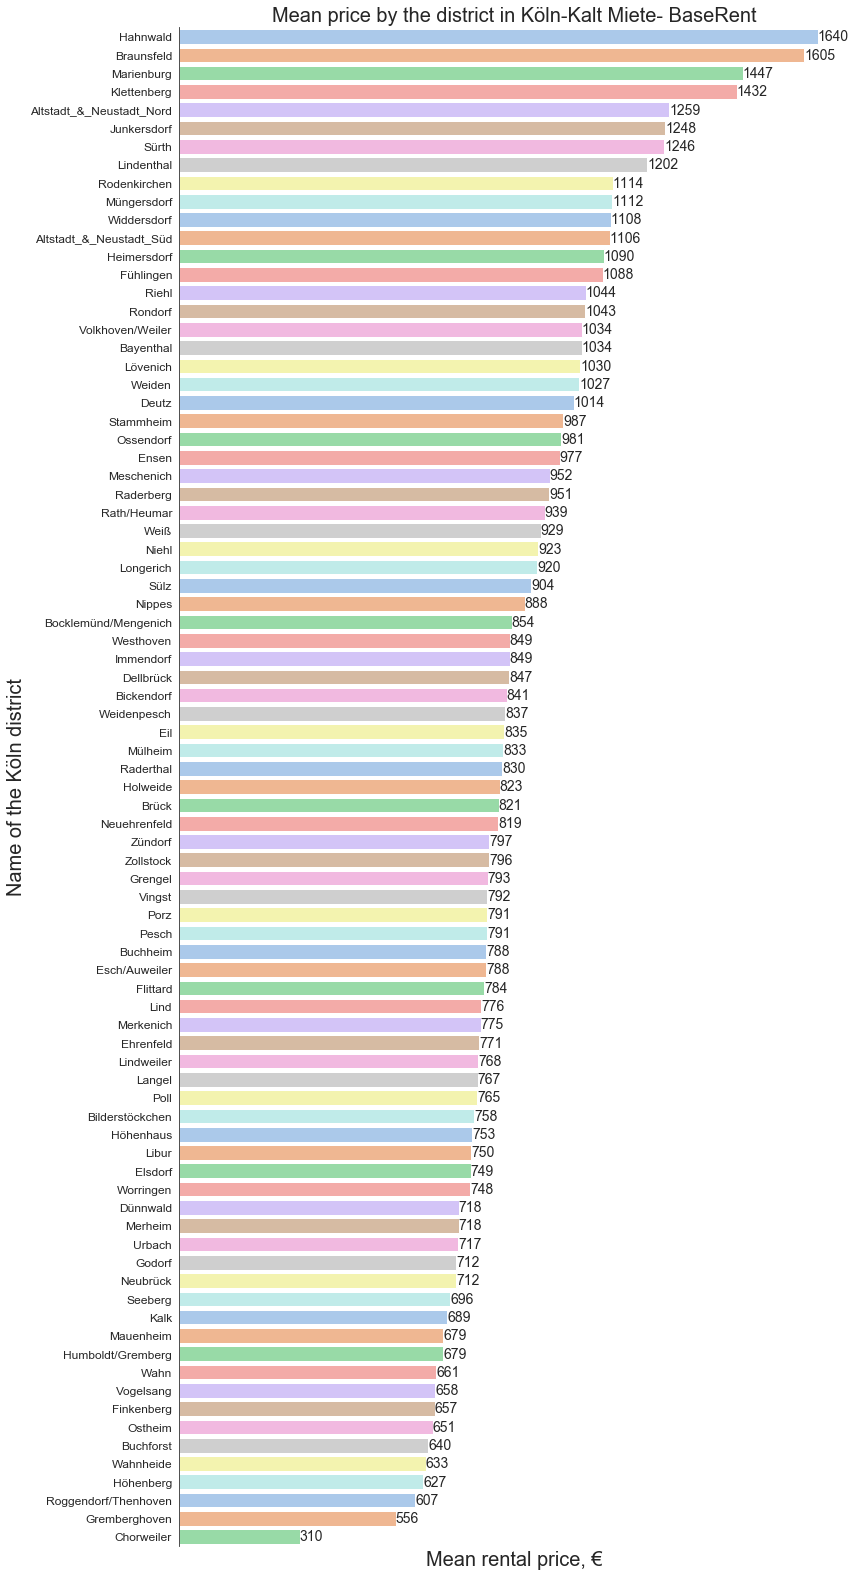

In [256]:
sns.set_style('white')

fig = plt.subplots(figsize=(12, 22))
ax = sns.barplot(x='baseRent',
                 y='regio3',
                 data=Cologne_rents_Predict_by_Köln_district_01,
                 orient='h',
                 palette='pastel')

# Setting the annotation on the top of the barchart
n = 0
for land, value in Cologne_rents_Predict_by_Köln_district_01.iterrows():
    ax.text(x=value[1],  # where to put the text on the x coordinates
            y=n,  # where to put the text on the y coordinates
            s=value[1],  # value to text
            fontsize=14,  # fontsize
            horizontalalignment='left',  # center the text to be more pleasant
            verticalalignment='center')
    n += 1

ax.tick_params(axis='x', labelsize=12, labelbottom=False)
ax.tick_params(axis='y', labelsize=12, bottom='off')
ax.set_title('Mean price by the district in Köln-Kalt Miete- BaseRent', fontsize=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)


ax.set_ylabel('Name of the Köln district', fontsize=20)
ax.set_xlabel('Mean rental price, €', fontsize=20)
plt.tight_layout()

plt.show()

After examining our average pricing (Baserent) by district in Köln, it is clear that

1. Hahnbald, Braunsfeld, Marienburg, Klettenberg, Sürth, Altstadt_ und Neustadt nord, and so on are the most expensive districts.

2. The less expensive districts are Buchforst, Wahnheide, Höhenberg, Roggendorf/Thenhoven, Gremberghoven, Chorweiler, and so on.

3. X-asis denotes our average rental price, whereas Y-asis denotes the complete Köln district name.

4. In comparison to other districts, the districts of Braunsfeld, Marienburg, and Klettenberg pay a lot of additional costs, but the district of Sürth pays a little amount of additional costs.

# Mean price based on different Street in Köln District 

In [216]:
Street_Köln = Cologne_rents_Predict[Cologne_rents_Predict["street"].str.contains(r"[Kk]reis") == False]
Cologne_rents_by_street = Street_Köln.pivot_table(values='totalRent', index='street', aggfunc=(np.mean)).reset_index()
Cologne_rents_by_street = Cologne_rents_by_street.sort_values(by=['totalRent'], ascending=False)
Cologne_rents_by_street['totalRent'] = Cologne_rents_by_street['totalRent'].astype(int)

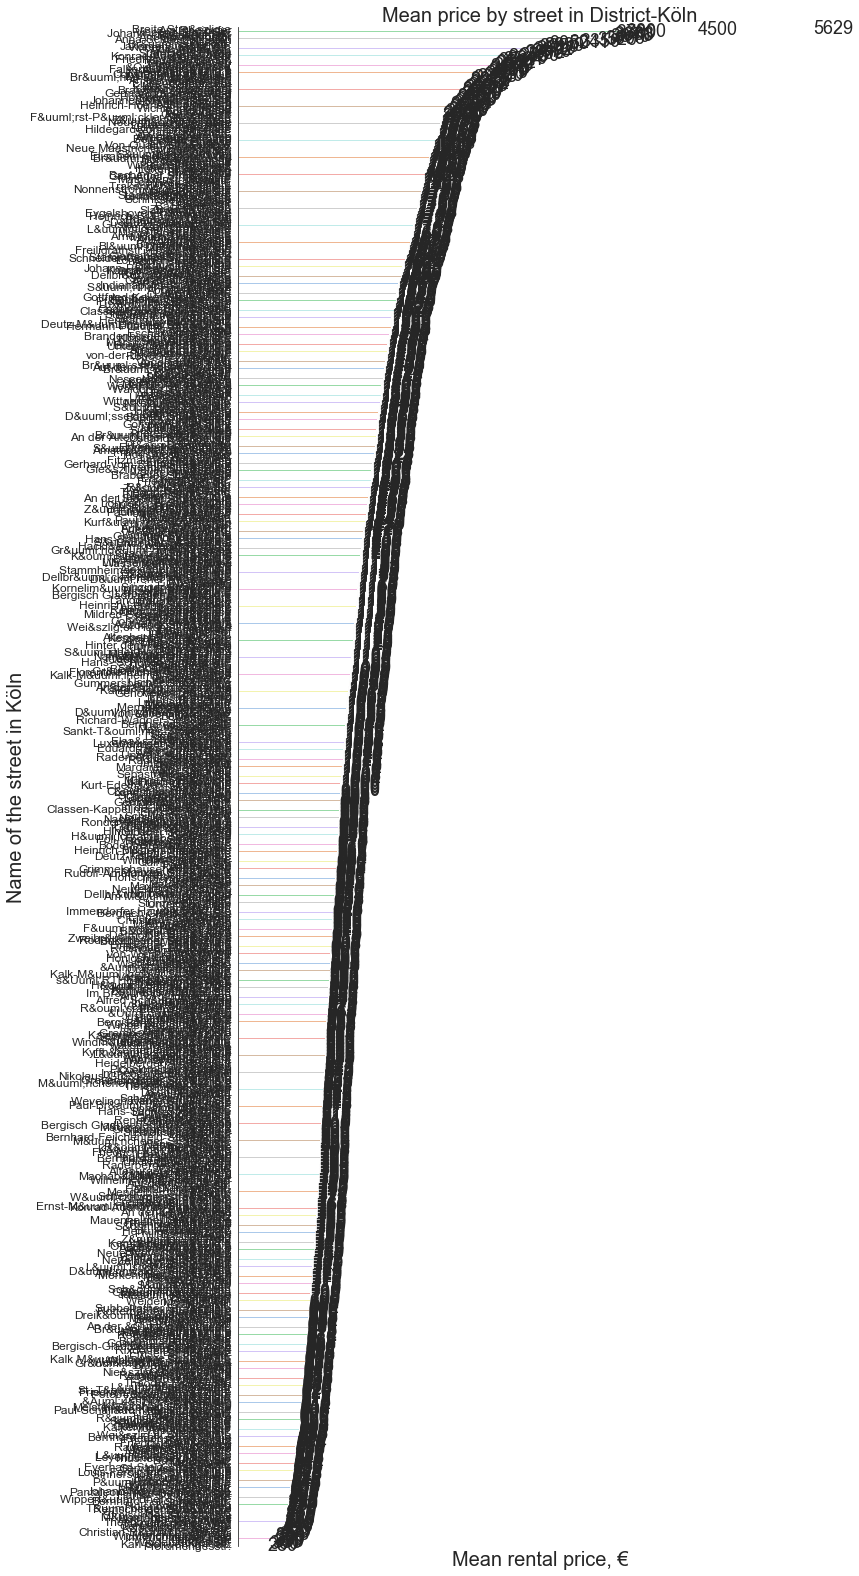

In [229]:
sns.set_style('white')

fig = plt.subplots(figsize=(12, 22))
ax = sns.barplot(x='totalRent',
                 y='street',
                 data=Cologne_rents_by_street,
                 orient='h',
                 palette='pastel')

# Setting the annotation on the top of the barchart
n = 0
for land, value in Cologne_rents_by_street.iterrows():
    ax.text(x=value[1],  # where to put the text on the x coordinates
            y=n,  # where to put the text on the y coordinates
            s=value[1],  # value to text
            fontsize=18,  # fontsize
            horizontalalignment='left',  # center the text to be more pleasant
            verticalalignment='center')
    n += 1

ax.tick_params(axis='x', labelsize= 12, labelbottom=False)
ax.tick_params(axis='y', labelsize= 12, bottom='off')
ax.set_title('Mean price by street in District-Köln', fontsize=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)


ax.set_ylabel('Name of the street in Köln', fontsize=20)
ax.set_xlabel('Mean rental price, €', fontsize=20)
plt.tight_layout()

plt.show()

We cant't see a clear idea about the mean rental prize in differnt street in Köln beacuse there are lot of missing value in our feature street and there are low of street in our street feature.

# Data Pre-Processing-Missing Value 

In [102]:
Cologne_rents_Predict.isnull().sum()

regio1                         0
serviceCharge                130
heatingType                  395
telekomTvOffer               468
telekomHybridUploadSpeed    2280
newlyConst                     0
balcony                        0
picturecount                   0
pricetrend                    11
telekomUploadSpeed           468
totalRent                    432
yearConstructed              737
scoutId                        0
noParkSpaces                1774
firingTypes                  607
hasKitchen                     0
geo_bln                        0
cellar                         0
yearConstructedRange         737
baseRent                       0
houseNumber                  842
livingSpace                    0
geo_krs                        0
condition                    562
interiorQual                 955
petsAllowed                 1073
street                         0
streetPlain                  842
lift                           0
baseRentRange                  0
typeOfFlat

The function isnull().sum() gives us the information of how many missing values we have for each column. The missing values for telekomHybridUploadSpeed, noParkSpaces, petsAllowed , heatingCosts, energyEfficiencyClass , electricityBasePrice , electricityKwhPrice, lastRefurbish , and thermalChar  seem to be a lot, and newlyConst,Balcony,picture count, scout id, street, lift, base rent range, geo_plz,noRooms ,NoRoomRange,garden,livingSpaceRange, regio2,regio3,date, balcony they have no missing value.  

However, it's not easy to know the overall shape and structure of the missing values only by looking at this information. In order to see the ratio and pattern of missing values, we can use missingno library in Python.

In [104]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - missingno


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.12.0               |   py37haa95532_0        14.4 MB
    missingno-0.4.1            |             py_0          10 KB  conda-forge/label/gcc7
    ------------------------------------------------------------
                                           Total:        14.5 MB

The following NEW packages will be INSTALLED:

  missingno          conda-forge/label/gcc7/noarch::missingno-0.4.1-py_0

The following packages will be UPDATED:

  conda                                        4.8.2-py37_0 --> 4.12.0-py37haa95532_0




conda-4.12.0         | 14.4 MB   |            |   0% 
conda-4.12.0         | 14.4 MB   |            |   0% 
conda-4.12.0         | 14.4 MB   | 1          |   2% 
con


EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




# Install package missingno for showing  missing values using visualization.- link[https://anaconda.org/conda-forge/missingno]

In [108]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [109]:
import missingno as msno

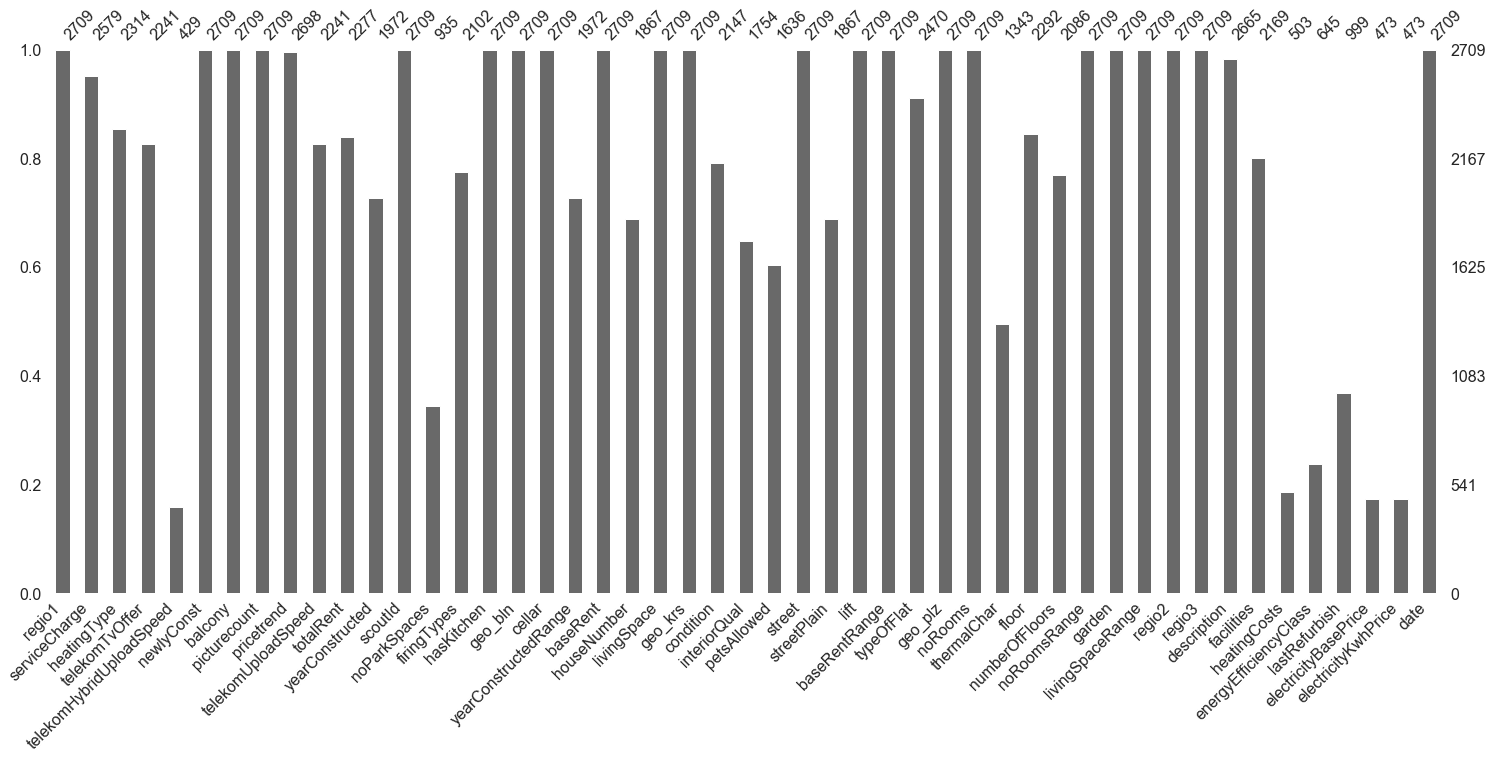

In [111]:
# show the number of missing values using visualization
msno.bar(Cologne_rents_Predict)

# the pattern of missing values 

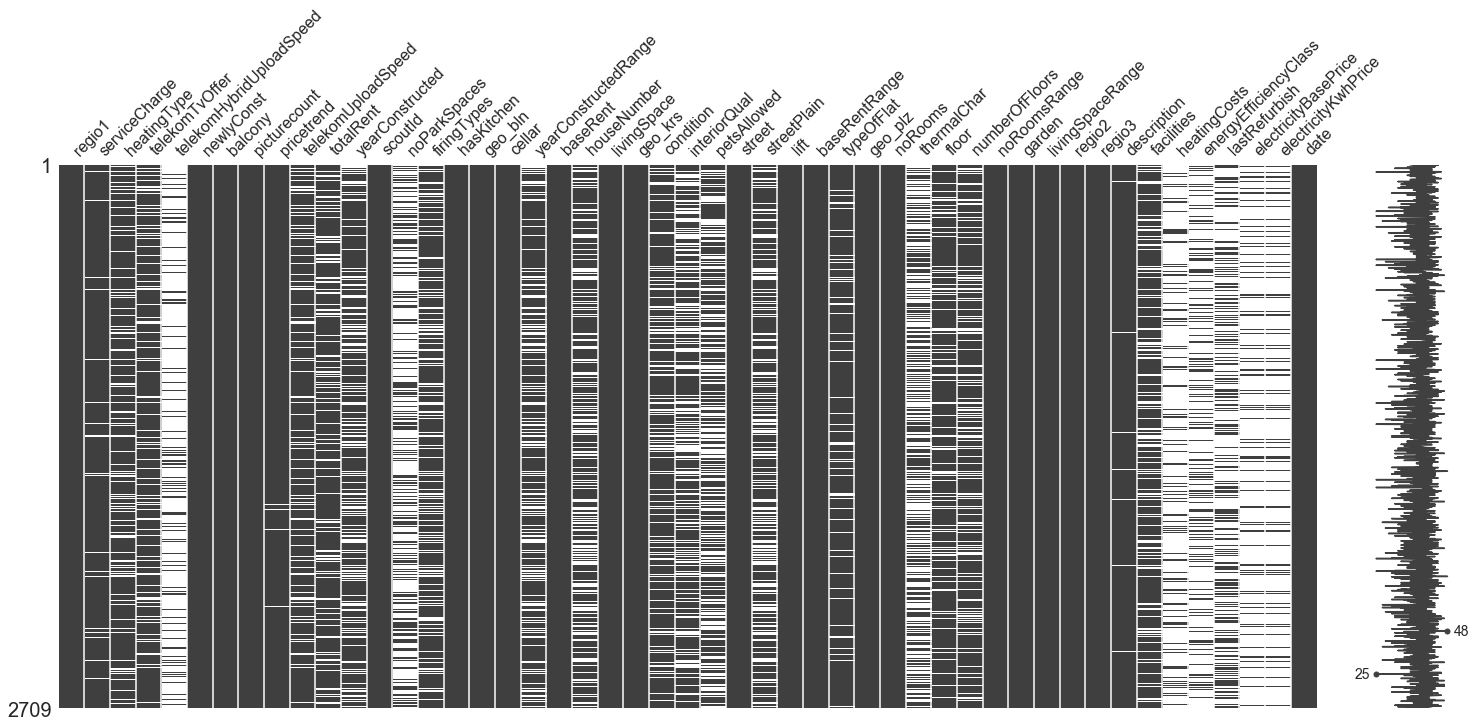

In [112]:
# the pattern of missing values 
msno.matrix(Cologne_rents_Predict)


# Missing value with heatmap

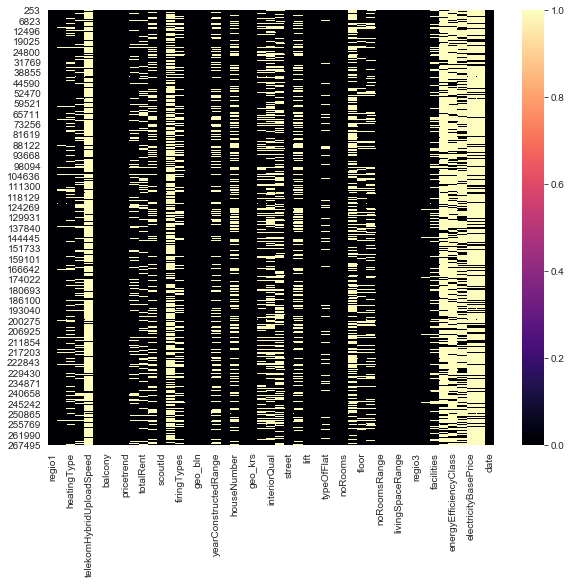

In [118]:
#Check for Missing Values with heatmap
plt.figure(figsize=(10,8))
sns.heatmap(Cologne_rents_Predict.isnull(), cmap = 'magma')

# Cleaning the Data: 
The boring part of this kernel. It might a bit confuse but what we're trying in this section is dealing with many things such as
1. Outliers
2. Missing Data
3. Drop columns
Etc. The result of this part is we will have a better dataset to analyze, virtualization and making a prediction.

In [142]:
def All_missing_values(df,norows):   # input by the df and the number of rows that you want to show
    total = Cologne_rents_Predict.isnull().sum().sort_values(ascending=False)
    percent = ((Cologne_rents_Predict.isnull().sum().sort_values(ascending=False)/Cologne_rents_Predict.shape[0])*100).sort_values(ascending=False)
    All_of_our_missing_data = pd.concat([total, percent ], axis=1, keys=['Total', 'Percent '])
    return(All_of_our_missing_data.head(norows))

In [143]:
All_missing_values (Cologne_rents_Predict,49) # we use the Cologne_rents_Predict and the number of rows to show is 50

,Total,Percent
telekomHybridUploadSpeed,2280,84.163898
electricityBasePrice,2236,82.539683
electricityKwhPrice,2236,82.539683
heatingCosts,2206,81.432263
energyEfficiencyClass,2064,76.190476
noParkSpaces,1774,65.485419
lastRefurbish,1710,63.122924
thermalChar,1366,50.424511
petsAllowed,1073,39.608712
interiorQual,955,35.252861


Top most  missing value features are 
1. telekomHybridUploadSpee 84.16%
2. electricityBasePrice 82.54%
3. electricityKwhPrice 82.54%
4. heatingCosts 81.43%
5. energyEfficiencyClass 76.19%
6. noParkSpaces 65.48%
7. lastRefurbish 63.12%
 thermalChar 50.42%
Later we can delete these feature which features that have over 50% missing value 

# Split the feature from 0-20 

In [251]:
Cologne_rents_Predict.iloc[:10, 0:20]

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent
253,Nordrhein_Westfalen,NaN,NaN,ONE_YEAR_FREE,NaN,False,False,10,4.91,40.0,NaN,1957.0,114370338,NaN,gas,False,Nordrhein_Westfalen,False,2.0,1444.0
336,Nordrhein_Westfalen,200.0,floor_heating,NaN,NaN,True,True,11,4.42,NaN,1500.0,2019.0,111691738,NaN,environmental_thermal_energy,False,Nordrhein_Westfalen,True,9.0,1300.0
352,Nordrhein_Westfalen,110.0,central_heating,ONE_YEAR_FREE,NaN,False,False,4,4.55,10.0,608.0,NaN,110773270,1.0,district_heating,True,Nordrhein_Westfalen,True,NaN,443.0
524,Nordrhein_Westfalen,274.8,central_heating,ONE_YEAR_FREE,10.0,False,True,16,5.08,10.0,1470.8,2001.0,106767161,NaN,combined_heat_and_power_regenerative_energy,False,Nordrhein_Westfalen,False,6.0,1196.0
590,Nordrhein_Westfalen,135.0,central_heating,NONE,NaN,False,True,10,4.37,2.4,950.0,1985.0,111783106,0.0,gas,False,Nordrhein_Westfalen,False,4.0,730.0
703,Nordrhein_Westfalen,150.0,gas_heating,ONE_YEAR_FREE,NaN,False,True,12,4.07,40.0,1150.0,1935.0,110583072,NaN,gas,False,Nordrhein_Westfalen,True,1.0,1000.0
828,Nordrhein_Westfalen,170.0,central_heating,ONE_YEAR_FREE,NaN,False,True,10,4.54,40.0,1770.0,1957.0,115528509,NaN,gas,False,Nordrhein_Westfalen,True,2.0,1500.0
966,Nordrhein_Westfalen,50.0,central_heating,ONE_YEAR_FREE,NaN,False,False,12,5.08,40.0,740.0,NaN,111417664,NaN,NaN,True,Nordrhein_Westfalen,False,NaN,690.0
1024,Nordrhein_Westfalen,300.0,self_contained_central_heating,ON_DEMAND,NaN,False,True,12,5.08,2.4,1600.0,1972.0,102559335,NaN,district_heating,True,Nordrhein_Westfalen,True,3.0,1300.0
1063,Nordrhein_Westfalen,120.0,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,False,13,5.45,40.0,1170.0,NaN,104550302,NaN,gas,False,Nordrhein_Westfalen,True,NaN,1050.0


In [168]:
Cologne_rents_Predict['telekomTvOffer'].value_counts()

ONE_YEAR_FREE    2221
NONE               12
ON_DEMAND           8
Name: telekomTvOffer, dtype: int64

In [171]:
Cologne_rents_Predict['firingTypes'].value_counts()

gas                                            1215
district_heating                                320
oil                                             204
natural_gas_light                               103
local_heating                                    72
electricity                                      46
geothermal                                       32
natural_gas_heavy                                19
pellet_heating                                   17
gas:electricity                                  13
combined_heat_and_power_fossil_fuels             11
wood                                              7
solar_heating                                     6
environmental_thermal_energy                      5
combined_heat_and_power_regenerative_energy       5
gas:oil                                           4
heat_supply                                       3
district_heating:electricity                      3
steam_district_heating                            3
combined_hea

In [169]:
Cologne_rents_Predict['heatingType'].value_counts()

central_heating                   1201
self_contained_central_heating     271
gas_heating                        249
floor_heating                      241
district_heating                   208
oil_heating                         43
heat_pump                           38
combined_heat_and_power_plant       29
electric_heating                    15
night_storage_heater                11
solar_heating                        4
wood_pellet_heating                  3
stove_heating                        1
Name: heatingType, dtype: int64

# Split the feature from 20-40 

In [166]:
Cologne_rents_Predict.iloc[:10, 20:40]

,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2
253,NaN,58.00,Köln,well_kept,NaN,no,no_information,NaN,False,7,apartment,50670,2.0,163.0,4.0,5.0,2,False,2,Köln
336,NaN,120.00,Köln,first_time_use,sophisticated,NaN,no_information,NaN,False,7,maisonette,51069,3.0,NaN,1.0,2.0,3,False,5,Köln
352,15,29.00,Köln,well_kept,normal,negotiable,Paul-Schall&uuml;ck-Stra&szlig;e,Paul-Schallück-Straße,True,3,apartment,50939,1.0,98.0,2.0,4.0,1,False,1,Köln
524,7,92.00,Köln,well_kept,sophisticated,no,Schwalbengasse,Schwalbengasse,True,7,ground_floor,50667,2.0,118.6,1.0,6.0,2,False,4,Köln
590,114,75.01,Köln,well_kept,NaN,NaN,Moltkestr.,Moltkestr.,False,5,apartment,50859,2.0,NaN,1.0,NaN,2,False,3,Köln
703,NaN,100.00,Köln,need_of_renovation,normal,yes,no_information,NaN,False,6,other,51107,4.5,NaN,NaN,NaN,4,True,4,Köln
828,10,100.35,Köln,modernized,sophisticated,no,Schinkelstra&szlig;e,Schinkelstraße,False,7,apartment,50933,4.0,189.1,1.0,3.0,4,False,4,Köln
966,5,17.00,Köln,modernized,sophisticated,no,Neue Weyerstra&szlig;e,Neue_Weyerstraße,False,5,apartment,50667,1.0,NaN,1.0,5.0,1,False,1,Köln
1024,79,102.00,Köln,fully_renovated,sophisticated,no,Kornrad-Adenauer-Ufer,Kornrad-Adenauer-Ufer,True,7,apartment,50668,3.0,95.0,13.0,14.0,3,False,5,Köln
1063,NaN,84.00,Köln,first_time_use_after_refurbishment,normal,no,no_information,NaN,False,7,roof_storey,50823,3.0,NaN,5.0,5.0,3,False,4,Köln


In [173]:
Cologne_rents_Predict['condition'].value_counts()

well_kept                             660
mint_condition                        385
fully_renovated                       321
first_time_use_after_refurbishment    212
modernized                            197
refurbished                           173
first_time_use                        169
negotiable                             16
need_of_renovation                     14
Name: condition, dtype: int64

In [174]:
Cologne_rents_Predict['street'].value_counts()

no_information                                       842
Wetzlarer Stra&szlig;e 18 / Nassaustra&szlig;e 13     46
Am Klostergarten                                      13
Frankfurter Str.                                      13
&Uuml;desheimer Weg                                   13
                                                    ... 
Arnoldsstr                                             1
Sternweg                                               1
Alteburger Stra&szlig;e                                1
Niehlerstr.                                            1
P&uuml;tzlachstra&szlig;e                              1
Name: street, Length: 1169, dtype: int64

In [175]:
Cologne_rents_Predict['streetPlain'].value_counts()

Wetzlarer_Straße_18_/_Nassaustraße_13    46
Üdesheimer_Weg                           13
Am_Klostergarten                         13
Frankfurter_Str.                         13
Trittenheimer_Str.                       11
                                         ..
Sternweg                                  1
Rather_Bungert                            1
Schirmerstr.                              1
Schneider-Clauss-Straße                   1
Friedrich-Schmidt-Str.                    1
Name: streetPlain, Length: 1183, dtype: int64

In [176]:
Cologne_rents_Predict['typeOfFlat'].value_counts()

apartment              1466
roof_storey             250
ground_floor            244
maisonette              173
other                    92
raised_ground_floor      77
terraced_flat            62
penthouse                59
half_basement            36
loft                     11
Name: typeOfFlat, dtype: int64

# Split the feature from 40 -49

In [167]:
Cologne_rents_Predict.iloc[:10, 40:49]

,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
253,Altstadt_&_Neustadt_Nord,gepflegtes Mehrfamilienhaus,"zeitlose Möblierung, Laminatboden, separate Ei...",NaN,NaN,NaN,NaN,NaN,Feb20
336,Dellbrück,Zum 01.11.2019 können Sie diese Maisonette-Woh...,"Bodentiefe Fenster, Fussbodenheizung, Fensterb...",NaN,NaN,NaN,NaN,NaN,Oct19
352,Sülz,Herzlich Willkommen in Ihrem neuen Zuhause.\n\...,NaN,NaN,NaN,NaN,NaN,NaN,Oct19
524,Altstadt_&_Neustadt_Nord,Diese schöne Wohnung befindet sich in bester I...,Die Wohnung ist modern ausgestattet. \n\nDas W...,NaN,NaN,NaN,90.76,0.1985,Sep18
590,Lövenich,ANMELDUNG FÜR BESICHTIGUNGSTERMIN\nMit dem unt...,NaN,85.0,NaN,NaN,NaN,NaN,Oct19
703,Rath/Heumar,Bei diesem Objekt handelt es sich um eine Dopp...,"Garten, Terrasse",NaN,NaN,NaN,NaN,NaN,May19
828,Braunsfeld,"Die Wohnung, welche zzt. durchgreifend moderni...",Der ideal aufgeteilte Grundriss der Wohnung mi...,100.0,NaN,2020.0,NaN,NaN,Feb20
966,Altstadt_&_Neustadt_Süd,Super zentral gelegen in der Innenstadt Altsta...,Die Wohnung selbst befindet sich in der 1. Eta...,NaN,NaN,2019.0,NaN,NaN,May19
1024,Altstadt_&_Neustadt_Nord,Schöne 3 Zimmer Wohnung mit toller Aussicht. \...,"Holzfußböden, Duschbad mit Anschlüssen für Was...",NaN,NaN,NaN,90.76,0.1985,Sep18
1063,Ehrenfeld,Bei der hier angebotenen Mietwohnung handelt e...,Die Ausstattung der Wohnungen ist neuwertig. E...,NaN,NaN,2018.0,90.76,0.1985,Sep18


In [177]:
Cologne_rents_Predict['description'].value_counts()

Die 137 Appartements sind auf 4 Geschosse verteilt.\n\nProjekthighlights:\n•\tTOP-Lage \n•\tModerne Architektur\n•\tHochwertig ausgestattete Bäder und Einbauküchen inkl. Mikrowelle\n•\tFunktionale und großzügige Raumaufteilung\n•\tWaschsalon im Haus (Wasch- und Trockengeräte stehen gegen eine Gebühr zur Verfügung)\n•\tAufzug\n•\tFahrrad-Stellplätze                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [178]:
Cologne_rents_Predict['regio3'].value_counts()

Altstadt_&_Neustadt_Nord    285
Altstadt_&_Neustadt_Süd     272
Lindenthal                  112
Mülheim                      99
Junkersdorf                  85
                           ... 
Fühlingen                     3
Finkenberg                    3
Chorweiler                    2
Hahnwald                      2
Libur                         1
Name: regio3, Length: 83, dtype: int64

In [179]:
Cologne_rents_Predict['facilities'].value_counts()

Die Appartements sind voll möbliert und modern eingerichtet. Eine Pantry-Küche mit Herd, Spüle, Kühlschrank, Mikrowelle, Kleiderschrank, Schreibtisch mit Stuhl, Hänge- und Standregal, Garderobe mit Spiegel, Bett mit Lattenrost (90 cm x 200 cm) vervollständigen die Einrichtung.\nDas Objekt umfasst folgende Appartements:\n•\t137 Appartements (19 - 74 m² Wohnfläche)\n•\t10 Kfz-Stellplätze / 28 TG-Stellplätze                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [180]:
Cologne_rents_Predict['date'].value_counts()

May19    819
Oct19    718
Feb20    699
Sep18    473
Name: date, dtype: int64

In [243]:
!pip install --user -U pandas-profiling

     -------------------------------------- 262.6/262.6 KB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 63.1/63.1 KB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 10.0/10.0 MB 4.1 MB/s eta 0:00:00
     -------------------------------------- 102.4/102.4 KB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 78.4/78.4 KB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 3.6 MB/s eta 0:00:00
     -------------------------------------- 673.5/673.5 KB 4.2 MB/s eta 0:00:00
     -------------------------------------- 292.8/292.8 KB 6.0 MB/s eta 0:00:00
     -------------------------------------- 307.0/307.0 KB 3.8 MB/s eta 0:00:00
     -------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\md nazmul hasan\\appdata\\roaming\\python\\python37\\site-packages\\matplotlib\\backends\\_backend_agg.cp37-win_amd64.pyd'
Check the permissions.

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

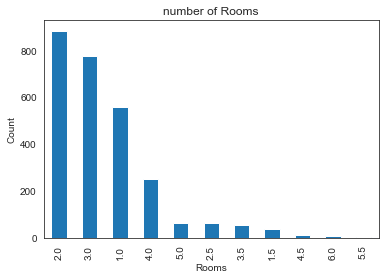

In [257]:
Cologne_rents_Predict['noRooms'].value_counts().plot(kind='bar')
plt.title('number of Rooms')
plt.xlabel('Rooms')
plt.ylabel('Count')
sns.despine

In [ ]:
1. Most people would like to have a two-room house, and their demand is high in Köln.

2. The 6-room house is in lower demand. Maybe it is because of the high cost.

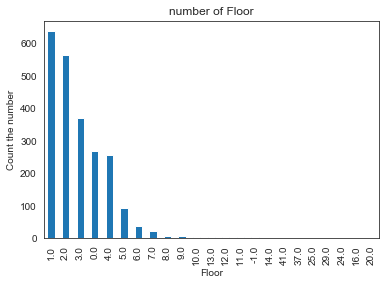

In [260]:
plt.title('number of Floor')
plt.xlabel('Floor')
plt.ylabel('Count the number')
sns.despine
Cologne_rents_Predict.floor.value_counts().plot(kind='bar')

1. The most popular floors in Köln are the first and second floors.

2. In Köln, the 8th and 9th floors are the lowest ranked.
